<a href="https://colab.research.google.com/github/chiardy90/DDN_Santander_customer_transaction_prediction/blob/main/DDN_Santander_customer_transaction_prediction_github_ipynb_%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Santander customer transaction prediction 
Please download this file first
* [[Kaggle Link](https://www.kaggle.com/c/santander-customer-transaction-prediction/data)]

## Step: 0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls drive/MyDrive/Colab_Notebooks/Santander_Customer_Transaction_Prediction

In [4]:
! cp drive/MyDrive/Colab_Notebooks/Santander_Customer_Transaction_Prediction/train.csv ./
! cp drive/MyDrive/Colab_Notebooks/Santander_Customer_Transaction_Prediction/test.csv ./
! cp drive/MyDrive/Colab_Notebooks/Santander_Customer_Transaction_Prediction/sample_submission.csv ./


## Step: 1：Read CSV

In [5]:
import pandas as pd

Dataset = pd.read_csv("train.csv")

Dataset.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Step: 2：Data Visualization and Feature Engineering.


In [6]:
# note：enumerate(), Dataset.columns, isnull(), sum()

# cheak NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位(i.e., {col}) 的缺失值有{Dataset[col].isnull().sum()}筆")

第1個欄位(i.e., ID_code) 的缺失值有0筆
第2個欄位(i.e., target) 的缺失值有0筆
第3個欄位(i.e., var_0) 的缺失值有0筆
第4個欄位(i.e., var_1) 的缺失值有0筆
第5個欄位(i.e., var_2) 的缺失值有0筆
第6個欄位(i.e., var_3) 的缺失值有0筆
第7個欄位(i.e., var_4) 的缺失值有0筆
第8個欄位(i.e., var_5) 的缺失值有0筆
第9個欄位(i.e., var_6) 的缺失值有0筆
第10個欄位(i.e., var_7) 的缺失值有0筆
第11個欄位(i.e., var_8) 的缺失值有0筆
第12個欄位(i.e., var_9) 的缺失值有0筆
第13個欄位(i.e., var_10) 的缺失值有0筆
第14個欄位(i.e., var_11) 的缺失值有0筆
第15個欄位(i.e., var_12) 的缺失值有0筆
第16個欄位(i.e., var_13) 的缺失值有0筆
第17個欄位(i.e., var_14) 的缺失值有0筆
第18個欄位(i.e., var_15) 的缺失值有0筆
第19個欄位(i.e., var_16) 的缺失值有0筆
第20個欄位(i.e., var_17) 的缺失值有0筆
第21個欄位(i.e., var_18) 的缺失值有0筆
第22個欄位(i.e., var_19) 的缺失值有0筆
第23個欄位(i.e., var_20) 的缺失值有0筆
第24個欄位(i.e., var_21) 的缺失值有0筆
第25個欄位(i.e., var_22) 的缺失值有0筆
第26個欄位(i.e., var_23) 的缺失值有0筆
第27個欄位(i.e., var_24) 的缺失值有0筆
第28個欄位(i.e., var_25) 的缺失值有0筆
第29個欄位(i.e., var_26) 的缺失值有0筆
第30個欄位(i.e., var_27) 的缺失值有0筆
第31個欄位(i.e., var_28) 的缺失值有0筆
第32個欄位(i.e., var_29) 的缺失值有0筆
第33個欄位(i.e., var_30) 的缺失值有0筆
第34個欄位(i.e., var_31) 的缺失值有0筆
第35個欄位(i.e., var_32) 的缺失值有0筆
第36

In [7]:
# note：plt.hist/plot/pie
import matplotlib.pyplot as plt

### (ID_code)

In [8]:
print(Dataset["ID_code"])

# need drop
Dataset = Dataset.drop(["ID_code"], axis=1)

0              train_0
1              train_1
2              train_2
3              train_3
4              train_4
              ...     
199995    train_199995
199996    train_199996
199997    train_199997
199998    train_199998
199999    train_199999
Name: ID_code, Length: 200000, dtype: object


### (target)

0    179902
1     20098
Name: target, dtype: int64


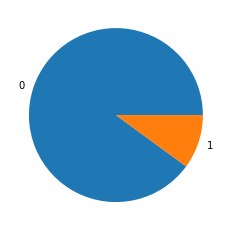

In [9]:
# note：Dataset["target"], value_counts()

print(Dataset["target"].value_counts())

plt.pie(Dataset["target"].value_counts(), labels=["0", "1"])
plt.show()

## Step 3: Identify Numerical and Categorical Features

In [10]:
# note：dtype
numerical_attributes = []
categorical_attributes = []

for col in Dataset.columns:

  col_type = Dataset[col].dtype
  # print(col_type)

  if col_type == "int64" or col_type == "float64":
    numerical_attributes.append(col)

  elif col_type == "object":
    categorical_attributes.append(col)

# then doing Feature Scaling later，so remove Y.
numerical_attributes.remove("target")
  
print(f"數值型的欄位有:{numerical_attributes}")
print(f"類別型的欄位有{categorical_attributes}")

數值型的欄位有:['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', '

## Step 4 : Perform One-Hot Encoding
But it's all numerical data, no need for this step

## Step 5: Perform data segmentation

In [11]:
# note：train_test_split(X, Y, test_size)

from sklearn.model_selection import train_test_split

Y = Dataset["target"]
X= Dataset.drop(["target"], axis=1)

X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.2)

print(f"訓練資料集(X) {X_train.shape}")
print(f"訓練資料集(Y) {Y_train.shape}")
print(f"驗證(/開發)資料集(X) {X_dev.shape}")
print(f"驗證(/開發)資料集(Y) {Y_dev.shape}")

訓練資料集(X) (160000, 200)
訓練資料集(Y) (160000,)
驗證(/開發)資料集(X) (40000, 200)
驗證(/開發)資料集(Y) (40000,)


## Step 6: Perform Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_numerical = X_train[numerical_attributes]
X_dev_numerical = X_dev[numerical_attributes]

# fit
x_scaler = StandardScaler().fit(X_train_numerical)

# Use the scaler to transform the training dataset and the validation dataset
X_train_trans = x_scaler.transform(X_train_numerical)
X_dev_trans = x_scaler.transform(X_dev_numerical)

# Override the field
X_train[numerical_attributes] = X_train_trans
X_dev[numerical_attributes] = X_dev_trans


In [13]:
X_train.shape

(160000, 200)

## Step 7: Designing Deep Learning Models

In [14]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

L2_Lambda = 0.01
Drop_Prob = 0.1

# Design Model
DNN_model = tf.keras.models.Sequential([

  # input_layer
  tf.keras.layers.Flatten(input_shape=(200, ), name="input_layer"),

  # hidden_layer_
  tf.keras.layers.Dense(units=512, activation="relu", name="hidden_layer_1", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=1024, activation="relu", name="hidden_layer_2", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=2048, activation="relu", name="hidden_layer_3", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=4096, activation="relu", name="hidden_layer_4", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=2048, activation="relu", name="hidden_layer_5", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=1024, activation="relu", name="hidden_layer_6", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=512, activation="relu", name="hidden_layer_7", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=256, activation="relu", name="hidden_layer_8", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dropout(Drop_Prob),
  tf.keras.layers.Dense(units=128, activation="relu", name="hidden_layer_9", kernel_regularizer=l2(L2_Lambda)),
  tf.keras.layers.Dense(units=10, activation="relu", name="hidden_layer_10", kernel_regularizer=l2(L2_Lambda)),
  
  # output_layer
  tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer") # ==> output a value between 0~1，so use sigmoid
])

# 設定超參數
Num_of_Epoch = 50 
Batch_Size = 2000 
Learning_Rate = 1e-4 

# Loss Function
Loss_Function = tf.keras.losses.BinaryCrossentropy()

# Optimizer
Optimizer_Adam = tf.keras.optimizers.Adam(learning_rate = Learning_Rate)

# compile
DNN_model.compile(
  optimizer=Optimizer_Adam,
  loss=Loss_Function, 
)

# Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 30:    # recommended to set 1/2 of Epoch
    return lr
  else:
    return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

## Step 8: Train model

In [17]:
History = DNN_model.fit(
  x = X_train,
  y = Y_train,
  validation_data = (X_dev, Y_dev),
  epochs = Num_of_Epoch,
  batch_size = Batch_Size,
  callbacks = [callback]
)

Epoch 1/50
80/80 [==============================] - 20s 179ms/step - loss: 77.9816 - val_loss: 55.8824 - lr: 1.0000e-04
Epoch 2/50
80/80 [==============================] - 14s 173ms/step - loss: 41.7988 - val_loss: 30.1277 - lr: 1.0000e-04
Epoch 3/50
80/80 [==============================] - 14s 170ms/step - loss: 22.7425 - val_loss: 16.6259 - lr: 1.0000e-04
Epoch 4/50
80/80 [==============================] - 14s 174ms/step - loss: 12.7654 - val_loss: 9.5606 - lr: 1.0000e-04
Epoch 5/50
80/80 [==============================] - 14s 170ms/step - loss: 7.5170 - val_loss: 5.8026 - lr: 1.0000e-04
Epoch 6/50
80/80 [==============================] - 14s 172ms/step - loss: 4.6826 - val_loss: 3.7287 - lr: 1.0000e-04
Epoch 7/50
80/80 [==============================] - 14s 176ms/step - loss: 3.0852 - val_loss: 2.5277 - lr: 1.0000e-04
Epoch 8/50
80/80 [==============================] - 14s 170ms/step - loss: 2.1397 - val_loss: 1.7977 - lr: 1.0000e-04
Epoch 9/50
80/80 [==============================]

## Step 9: Evaluate model performance

History 儲存的內容有： dict_keys(['loss', 'val_loss', 'lr'])


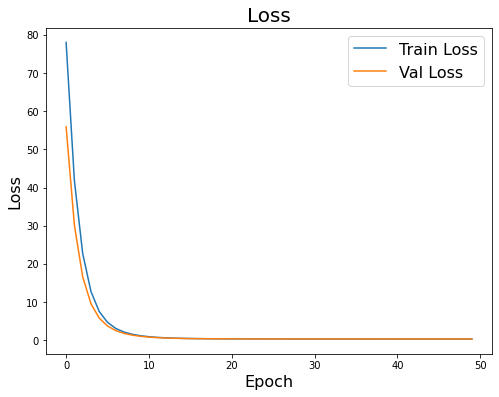

In [18]:
print("History 儲存的內容有：", History.history.keys())

Train_Loss = History.history["loss"]
Val_Loss = History.history["val_loss"]

# Draw the curve of loss with epoch
plt.figure(figsize=(8,6))
plt.plot(Train_Loss, label="Train Loss")
plt.plot(Val_Loss, label="Val Loss")
plt.title("Loss", fontsize=20)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(fontsize=16)
plt.show()

## Step 10: Predict and evaluate

In [19]:
# use for loop to search Threshold，can also be adjusted manually(recommended < 0.5)
# note：can refer to Y_dev there are several positive ones

Threshold = 0.235
print(f"將 Threshold 調整成 {Threshold} (大於此值為陽性 1 ，反之為陰性 0 )\n")

將 Threshold 調整成 0.235 (大於此值為陽性 1 ，反之為陰性 0 )



In [20]:
# note：X_dev.to_numpy(), tensor.numpy(), reshape(-1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time

# predicted probability
tic = time()
DNN_Positive_Proba = DNN_model(X_dev.to_numpy()).numpy().reshape(-1)
DNN_Decision = (DNN_Positive_Proba > Threshold).astype(int)
toc = time()
print(f"預測「機率」所花費時間為 {round(toc-tic)} (sec)\n")

# Classification model performance
print(f"準確率(Accuracy)為：{round(accuracy_score(Y_dev, DNN_Decision)*100, 2)} %")
print(f"精確率(Precision): {round(precision_score(Y_dev, DNN_Decision, pos_label=1)*100, 2)} %")
print(f"召回率(Recall)): {round(recall_score(Y_dev, DNN_Decision, pos_label=1)*100, 2)} %")
print(f"F1分數(F1-Score): {round(f1_score(Y_dev, DNN_Decision, pos_label=1)*100, 2)} %")

預測「機率」所花費時間為 1 (sec)

準確率(Accuracy)為：89.08 %
精確率(Precision): 46.11 %
召回率(Recall)): 53.31 %
F1分數(F1-Score): 49.45 %


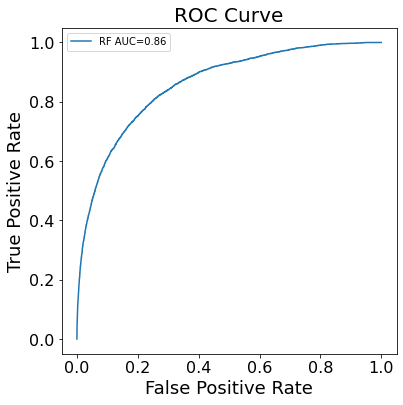

In [22]:
# note: roc_curve(Y_true, Positive_Probability, pos_label), auc(frp, tpr)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# first model
DNN_fpr, DNN_tpr, DNN_thresholds = roc_curve(Y_dev, DNN_Positive_Proba, pos_label=1)
DNN_AUC = auc(DNN_fpr, DNN_tpr)

# draw ROC curve
plt.figure(figsize=(6,6))
plt.plot(DNN_fpr, DNN_tpr, label=f"RF AUC={round(DNN_AUC,3)}")
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()